# Data Exploration and Analysis
on TCGA (The Cancer Genome Atlas) and CCLE (Cancer Cell Line Encyclopedia)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os.path
import pacmap

## Load the data
in the same directory there has to be a folder named data with filtered_17713_gene_names.csv, CCLE_expression_full.csv and EB++AdjustPANCAN_IlluminaHiSeq_RNASeqV2.geneExp.xena in it.

In [3]:
filter_list = pd.read_csv("data/filtered_17713_gene_names.csv")
filter_list_stripped = filter_list["# Gene"].str.split(' \(').str[0]
filter_list_stripped

if not os.path.isfile("data/ccle.csv"):
    print("load ccle from full file. Code is ineficient, this takes a while")
    ccle_full = pd.read_csv("data/CCLE_expression_full.csv", index_col=0)
    ccle_full.columns = ccle_full.columns.str.split(' \(').str[0]
    filtered_columns = [col for col in ccle_full.columns if filter_list_stripped.str.contains(col).any()]
    ccle = ccle_full[filtered_columns]
    ccle.to_csv("data/ccle.csv")
    del ccle_full
else:
    ccle = pd.read_csv("data/ccle.csv", index_col=0)

if not os.path.isfile("data/tcga.csv"):
    print("load tcga from full file")
    tcga_full = pd.read_csv("data/EB++AdjustPANCAN_IlluminaHiSeq_RNASeqV2.geneExp.xena", sep="\t", index_col=0)
    tcga = tcga_full[tcga_full.index.isin(filter_list_stripped)]
    tcga = tcga.T
    tcga
    tcga.to_csv("data/tcga.csv")
    del tcga_full
else:
    tcga = pd.read_csv("data/tcga.csv", index_col=0)

del filter_list
del filter_list_stripped

ccle = ccle.sort_index()
tcga = tcga.sort_index()

ccle_metadata_full = pd.read_csv("data/sample_info.csv")
ccle_metadata = ccle_metadata_full[ccle_metadata_full["DepMap_ID"].isin(ccle.index)]
ccle_metadata = ccle_metadata.set_index(ccle_metadata["DepMap_ID"])
ccle_metadata = ccle_metadata.drop(columns="DepMap_ID")
ccle_metadata = ccle_metadata.sort_index()

In [34]:
# remove all " in the csv file
input_file_path = 'data/final-resorted-samples-based-HiSeqV2-new(in).csv'
output_file_path = 'data/tcga_metadata_without_qoutation.csv'

# Read the content of the input file
with open(input_file_path, 'r') as f:
    content = f.read()

# Remove all occurrences of double quotes
cleaned_content = content.replace('"', '')

# Write the cleaned content to the output file
with open(output_file_path, 'w') as f:
    f.write(cleaned_content)


In [45]:
tcga_metadata = pd.read_csv("data/final-resorted-samples-based-HiSeqV2-new.csv", sep=",", index_col=1, low_memory=False)
tcga_metadata = tcga_metadata.drop(columns="Unnamed: 0")
tcga_metadata

,diagnosis,project,sample,experiment,run,read_count_as_reported_by_sra,reads_downloaded,proportion_of_reads_reported_by_sra_downloaded,paired_end,sra_misreported_paired_end,...,xml_primary_pathology_cholangitis_tissue_evidence,xml_antireflux_treatment,xml_family_history_of_stomach_cancer,xml_number_of_relatives_with_stomach_cancer,xml_primary_pathology_histological_type_list,xml_primary_pathology_history_myasthenia_gravis,xml_primary_pathology_section_myasthenia_gravis,junction_count,junction_coverage,junction_avg_coverage
sample_id,,,,,,,,,,,,,,,,,,,,,
TCGA-S9-A7J2-01A,LGG,TCGA,NaN,NaN,NaN,NaN,140863304.0,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,226031,7033193,31.116055
TCGA-G3-A3CH-11A,LIHC,TCGA,NaN,NaN,NaN,NaN,128733138.0,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149440,9115967,61.000850
TCGA-EK-A2RE-01A,CESC,TCGA,NaN,NaN,NaN,NaN,179869516.0,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215780,10959216,50.788840
TCGA-44-6778-01A,LUAD,TCGA,NaN,NaN,NaN,NaN,94853788.0,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209957,5111612,24.345995
TCGA-VM-A8C8-01A,LGG,TCGA,NaN,NaN,NaN,NaN,107967466.0,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,188206,4861527,25.830882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-95-7947-01A,LUAD,TCGA,NaN,NaN,NaN,NaN,151238840.0,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231961,9321883,40.187286
TCGA-VQ-AA6F-01A,STAD,TCGA,NaN,NaN,NaN,NaN,290813028.0,NaN,True,NaN,...,NaN,NO,NO,NaN,NaN,NaN,NaN,349398,25975712,74.344192
TCGA-55-6985-11A,LUAD,TCGA,NaN,NaN,NaN,NaN,149067452.0,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216379,7740249,35.771720


In [4]:
tcga

,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AADAC,AADACL2,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
TCGA-02-0047-01,6.98,0.00,15.05,5.40,5.22,1.16,8.87,8.92,0.00,0.00,...,8.03,8.66,6.05,8.48,10.12,0.69,10.24,11.92,10.45,9.24
TCGA-02-0055-01,8.62,0.00,15.39,1.42,8.93,0.64,9.22,8.31,0.64,0.00,...,8.87,7.95,5.45,8.14,9.25,2.60,9.85,13.49,9.25,9.49
TCGA-02-2483-01,8.09,0.00,14.36,1.82,6.46,0.00,10.11,8.95,0.00,0.00,...,9.42,9.39,4.35,8.67,9.76,5.50,10.24,12.31,9.70,9.46
TCGA-02-2485-01,6.41,0.00,12.93,7.73,7.29,0.56,9.99,8.25,0.56,0.00,...,8.79,8.79,5.78,8.10,10.40,0.00,10.06,12.31,10.16,9.45
TCGA-02-2486-01,6.77,0.00,15.32,6.71,5.49,0.00,9.46,8.62,0.00,0.00,...,7.39,6.24,5.03,7.64,9.35,0.00,9.43,12.93,9.30,9.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-ZS-A9CG-01,14.19,11.22,13.37,0.00,7.88,0.00,9.78,7.54,14.26,0.00,...,6.62,6.81,5.14,7.90,9.74,6.50,11.00,10.94,9.30,9.28
TCGA-ZT-A8OM-01,11.47,0.00,13.47,0.00,7.99,1.98,10.92,9.21,2.57,0.99,...,8.52,10.09,3.98,6.76,9.58,2.57,8.10,13.17,10.07,8.25
TCGA-ZU-A8S4-01,7.42,6.68,13.26,0.00,9.30,1.58,9.55,9.19,8.84,0.00,...,8.56,10.43,4.88,8.07,9.27,0.58,9.51,13.37,9.97,9.32
TCGA-ZU-A8S4-11,16.71,11.28,16.78,0.00,5.36,2.68,9.37,7.60,13.21,0.00,...,6.14,5.58,6.07,11.02,9.83,5.64,11.37,11.00,9.49,8.95


In [5]:
ccle

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,CCDC39.3,ARHGAP11B,POLR2J3.2,POLR2J3.3,SLFN12L.2,SLFN12L.3,C2orf27A,C8orf44,NPBWR1,CDR1
ACH-000001,5.183487,0.000000,7.497453,2.107688,4.217231,0.042644,0.903038,5.722193,4.676944,3.720278,...,1.292782,2.419539,3.563158,4.380591,0.356144,0.000000,1.589763,2.611172,0.028569,0.014355
ACH-000002,0.176323,0.000000,5.701549,1.238787,3.119356,4.140779,0.163499,4.133399,4.111866,2.347666,...,0.201634,2.625270,3.523562,3.593354,0.565597,0.163499,1.226509,2.790772,0.028569,0.000000
ACH-000003,5.309976,0.084064,7.845992,1.875780,3.894333,0.000000,0.056584,6.666473,4.738768,3.984589,...,0.150560,2.648465,3.204767,5.270155,0.000000,0.000000,1.495695,1.773996,0.000000,0.000000
ACH-000004,2.176323,0.000000,5.454176,2.477677,3.921246,0.887525,4.958379,3.949535,4.876762,4.829342,...,1.007196,3.404631,4.778734,6.093391,0.176323,0.000000,2.214125,3.773996,0.000000,0.000000
ACH-000005,2.451541,0.000000,5.884598,2.927896,5.299025,0.201634,5.759156,4.149747,5.530757,5.029895,...,0.933573,3.590961,4.104337,5.330558,0.526069,0.028569,2.976364,3.431623,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-002785,0.124328,0.000000,8.051590,2.201634,4.043519,0.137504,0.250962,6.194954,3.234195,3.085765,...,0.389567,2.286881,5.051372,4.368768,0.925999,0.000000,4.307429,3.523562,0.000000,0.000000
ACH-002800,5.293518,0.000000,6.915401,2.599318,3.058316,0.014355,4.491212,5.612647,3.917432,3.447579,...,0.310340,1.372952,4.666757,3.691534,0.014355,0.014355,3.687061,3.364572,1.117695,0.000000
ACH-002834,5.241840,0.000000,7.555509,1.922198,3.614710,0.163499,3.678072,6.548437,5.146900,4.751678,...,0.613532,1.182692,3.972693,4.898208,0.464668,0.000000,5.241459,1.521051,1.263034,1.124328
ACH-002847,2.908813,0.000000,6.351028,2.298658,4.336997,0.000000,3.715893,6.323910,5.116448,4.349790,...,0.344828,2.090853,2.592158,3.240314,0.713696,0.000000,3.169925,3.955127,1.333424,0.000000


comments regarding tcga and ccle: 
tcga data has 11069 rows. On the website they write once it has 11069 entries and once 11060. I have currently not found any metadata regarding which samples are cancer and which not.

ccle has metadata regarding which samples belong to which cell line. Also, ccle has fewer genes as some were _not_ present in this dataset.

## Basic Data Analysis

Text(0.5, 1.0, 'Genes in Dataset')

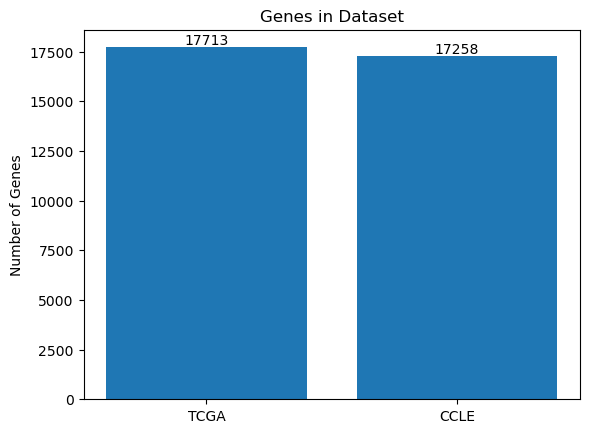

In [6]:

tcga_genes = tcga.shape[1]
ccle_genes = ccle.shape[1]

# Create bar plot
plt.bar(x=("TCGA", "CCLE"), height=(tcga_genes, ccle_genes))

# Add values to the bars
for i, value in enumerate((tcga_genes, ccle_genes)):
    plt.text(i, value + 0.05, str(value), ha='center', va='bottom')

# Add labels and title
plt.ylabel('Number of Genes')
plt.title('Genes in Dataset')

Text(0.5, 1.0, 'Samples for each dataset')

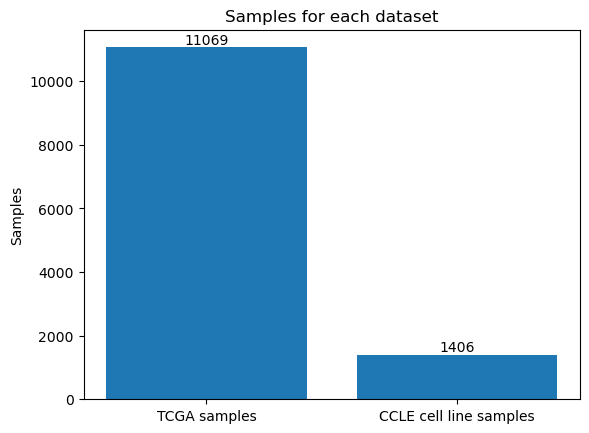

In [7]:
fig, ax1 = plt.subplots()

tcga_samples = tcga.shape[0]
ccle_cell_lines = ccle.shape[0]

# Create bar plot
plt.bar(x=("TCGA samples", "CCLE cell line samples"), height=(tcga_samples, ccle_cell_lines))

# Add values to the bars
for i, value in enumerate((tcga_samples, ccle_cell_lines)):
    plt.text(i, value + 0.05, str(value), ha='center', va='bottom')

# Add labels and title
plt.ylabel('Samples')
plt.title('Samples for each dataset')

## Data Analysis of CCLE


In [8]:
ccle_metadata

,cell_line_name,stripped_cell_line_name,CCLE_Name,alias,COSMICID,sex,source,RRID,WTSI_Master_Cell_ID,sample_collection_site,...,lineage_sub_subtype,lineage_molecular_subtype,default_growth_pattern,model_manipulation,model_manipulation_details,patient_id,parent_depmap_id,Cellosaurus_NCIt_disease,Cellosaurus_NCIt_id,Cellosaurus_issues
DepMap_ID,,,,,,,,,,,,,,,,,,,,,
ACH-000001,NIH:OVCAR-3,NIHOVCAR3,NIHOVCAR3_OVARY,OVCAR3,905933.0,Female,ATCC,CVCL_0465,2201.0,ascites,...,high_grade_serous,NaN,2D: adherent,NaN,NaN,PT-gj46wT,NaN,High grade ovarian serous adenocarcinoma,C105555,NaN
ACH-000002,HL-60,HL60,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,905938.0,Female,ATCC,CVCL_0002,55.0,haematopoietic_and_lymphoid_tissue,...,M3,NaN,2D: suspension,NaN,NaN,PT-5qa3uk,NaN,Adult acute myeloid leukemia,C9154,NaN
ACH-000003,CACO2,CACO2,CACO2_LARGE_INTESTINE,"CACO2, CaCo-2",NaN,Male,ATCC,CVCL_0025,NaN,Colon,...,NaN,NaN,NaN,NaN,NaN,PT-puKIyc,NaN,Colon adenocarcinoma,C4349,NaN
ACH-000004,HEL,HEL,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,907053.0,Male,DSMZ,CVCL_0001,783.0,haematopoietic_and_lymphoid_tissue,...,M6,NaN,2D: suspension,NaN,NaN,PT-q4K2cp,NaN,Erythroleukemia,C7152,NaN
ACH-000005,HEL 92.1.7,HEL9217,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,NaN,Male,ATCC,CVCL_2481,NaN,bone_marrow,...,M6,NaN,2D: suspension,NaN,NaN,PT-q4K2cp,ACH-000004,Erythroleukemia,C7152,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-002785,NCC-LMS1-C1,NCCLMS1C1,NaN,NaN,NaN,Female,Academic lab,CVCL_LK56,NaN,bone,...,NaN,NaN,2D: adherent,NaN,NaN,PT-6sPicj,NaN,Bone leiomyosarcoma,C7154,NaN
ACH-002800,NCC-MPNST2-C1,NCCMPNST2C1,NaN,NaN,NaN,Male,Academic lab,CVCL_YU13,NaN,NaN,...,NaN,NaN,2D: adherent,NaN,NaN,PT-WTpRkW,NaN,Malignant peripheral nerve sheath tumor,C3798,NaN
ACH-002834,PSS131R,PSS131R,PSS131R_Osteosarcoma,NaN,NaN,Female,NaN,NaN,NaN,bone,...,NaN,NaN,2D: adherent,NaN,NaN,PT-EcUHFc,NaN,NaN,NaN,NaN


In [9]:
ccle_metadata.columns
# most interesting: lineage lineage_subtype sex, ...

Index(['cell_line_name', 'stripped_cell_line_name', 'CCLE_Name', 'alias',
       'COSMICID', 'sex', 'source', 'RRID', 'WTSI_Master_Cell_ID',
       'sample_collection_site', 'primary_or_metastasis', 'primary_disease',
       'Subtype', 'age', 'Sanger_Model_ID', 'depmap_public_comments',
       'lineage', 'lineage_subtype', 'lineage_sub_subtype',
       'lineage_molecular_subtype', 'default_growth_pattern',
       'model_manipulation', 'model_manipulation_details', 'patient_id',
       'parent_depmap_id', 'Cellosaurus_NCIt_disease', 'Cellosaurus_NCIt_id',
       'Cellosaurus_issues'],
      dtype='object')

In [20]:
print("Gene expression dataset entries: {}, unique dataset entries: {}".format(len(ccle), len(ccle.drop_duplicates())))
print("unique DepMap_IDs: {}".format(len(ccle_metadata.index.unique())))
print("unique cell lines: {}".format(len(ccle_metadata["cell_line_name"].unique())))
print("unique stripped lines: {}".format(len(ccle_metadata["stripped_cell_line_name"].unique())))

Gene expression dataset entries: 1406, unique dataset entries: 1406
unique DepMap_IDs: 1406
unique cell lines: 1359
unique stripped lines: 1406


In [10]:
ccle_metadata.nunique()

cell_line_name                1358
stripped_cell_line_name       1406
CCLE_Name                     1404
alias                           83
COSMICID                       700
sex                              2
source                          24
RRID                          1393
WTSI_Master_Cell_ID            700
sample_collection_site          39
primary_or_metastasis            2
primary_disease                 33
Subtype                        148
age                             93
Sanger_Model_ID                820
depmap_public_comments          32
lineage                         30
lineage_subtype                 96
lineage_sub_subtype             76
lineage_molecular_subtype       16
default_growth_pattern           3
model_manipulation               3
model_manipulation_details       6
patient_id                    1341
parent_depmap_id                39
Cellosaurus_NCIt_disease       230
Cellosaurus_NCIt_id            230
Cellosaurus_issues             107
dtype: int64

In [42]:
ccle_metadata["primary_disease"]

DepMap_ID
ACH-000001             Ovarian Cancer
ACH-000002                   Leukemia
ACH-000003    Colon/Colorectal Cancer
ACH-000004                   Leukemia
ACH-000005                   Leukemia
                       ...           
ACH-002785                    Unknown
ACH-002800                    Unknown
ACH-002834                Bone Cancer
ACH-002847                    Unknown
ACH-002926                    Unknown
Name: primary_disease, Length: 1406, dtype: object

cell_line_name is not a unique (contains NaN and one duplicate: U-251 MG), stripped_cell_line_name is. The two U-251 MG are from different tissues, have different stripped_cell_line_name and have different gene expression -> not real duplicates

/tmp/ipykernel_149359/97794609.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(subset_transformed[:, 0], subset_transformed[:, 1], cmap="Spectral", label=id, s=0.6)


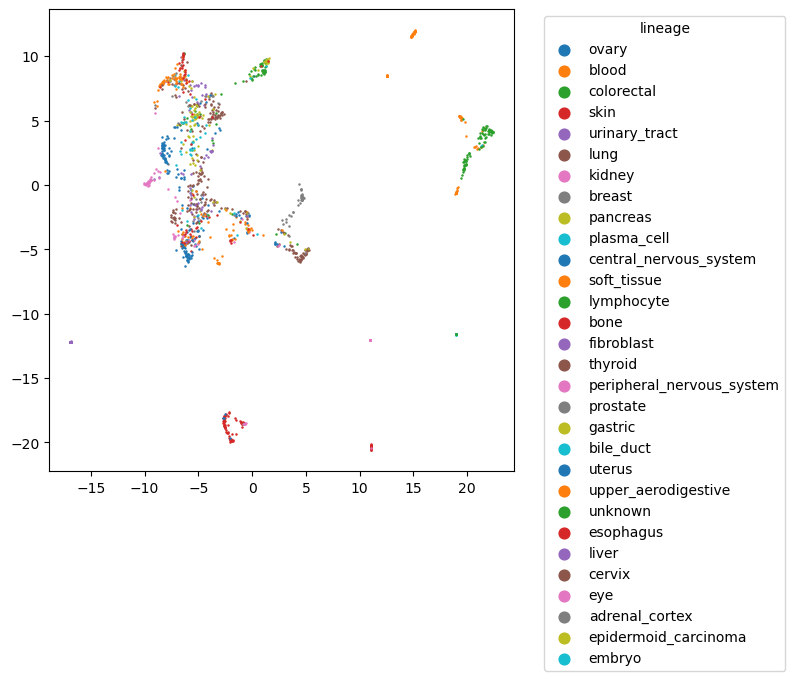

In [22]:

embedding = pacmap.PaCMAP(n_components=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0) 
ccle_transformed = embedding.fit_transform(ccle, init="pca")

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# select what should be color coded, e.g. sex, disease, ...
to_highlight = "lineage"
id_mapping = {id: i for i, id in enumerate(ccle_metadata[to_highlight].unique())}

for id, label in id_mapping.items():
    subset_indices = ccle_metadata[to_highlight] == id
    subset_transformed = ccle_transformed[subset_indices]
    ax.scatter(subset_transformed[:, 0], subset_transformed[:, 1], cmap="Spectral", label=id, s=0.6)

# Create a legend
if len(id_mapping) < 40:
    ax.legend(title=to_highlight, markerscale=10, bbox_to_anchor=(1.05, 1), loc='upper left')
else:
    plt.title(to_highlight)